# Analysis on Public Perception Towards LSE on Reddit

<h2>Table of Contents<span class="tocSkip"></span></h2><br>
<div class="toc">
    <span><a href="#Introduction" data-toc-modified-id="Introduction"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span>
        <ul class="toc-item">
            <li><span><a href="#Motivation" data-toc-modified-id="Motivation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Motivation</a></span></li>
            <li><span><a href="#Goal-of-the-study" data-toc-modified-id="Goal-of-the-study-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Goal of the study</a></span></li></ul></ul>
    <span><a href="#Data-Acquisition" data-toc-modified-id="Data-Acquisition-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Acquisition</a></span>
        <ul class="toc-item">
            <li><span><a href="#Reddit-posts" data-toc-modified-id="Reddit-posts-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reddit posts</a></span></li></ul></ul>
    <span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning</a></span><br>
    <span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Analysis</a></span>
        <ul class="toc-item">
            <li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span></li>
            <li><span><a href="#Q1:-What-are-some-common-traits-that-the-public-associate-LSE-with?" data-toc-modified-id="Q1:-What-are-some-common-traits-that-the-public-associate-LSE-with?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Q1: What are some common traits that the public associate LSE with?</a></span>
            <li><span><a href="#Q2:-What-do-people-on-Reddit-want-to-know-more-about-LSE?" data-toc-modified-id="Q2:-What-do-people-on-Reddit-want-to-know-more-about-LSE?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Q2: What do people on Reddit want to know more about LSE?</a></span></li></ul>
    <span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span>
        <ul class="toc-item">
            <li><span><a href="#Findings" data-toc-modified-id="Findings-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>References</a></span>
            <li><span><a href="#Limitations" data-toc-modified-id="References-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>References</a></span>
            <li><span><a href="#Future Improvements" data-toc-modified-id="Future-Improvements-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>References</a></span></li></ul></ul></ul></div>

## Introduction

### Motivation

As undergraduate students at the London School of Economics and Political Science (LSE), we want to know what is the public’s general perception about the university we are currently pursuing our degrees in. Through this project, we hope to understand of how reputable LSE is in the public's eyes, and how a degree from LSE could be beneficial in the workforce.

### Goal of the study

We hope to answer the following research questions:
1. What are some common traits that the public associate LSE with?
2. What do people on Reddit want to know more about LSE?

## Data Acquisition

### Reddit posts

To obtain the data required for our analysis, we used reddit API, which allows us to scrape up to 1000 posts from a subreddit. We collected our data on **15 April 2023**, where we managed to scrape 851 new posts from the subreddit "TheLse". For each post, we collected information about its title, content, and score (the number of upvotes minus the number of downvotes).

The code to acquire the data is stored in another notebook `data_acquisition.ipynb`, and the data is stored in the file `data.csv`. The data we got is shown below:

In [1]:
import pandas as pd

df = pd.read_csv('data.csv')
df

,title,content,score
0,LSE accomodation for couples,Hi! \n\nI will be moving with my partner to Lo...,3
1,which accommodation do rich international stud...,where do rich students live during their studi...,0
2,Bankside or Garden Hall,Im a general course student and can't choose b...,2
3,Is the reserve list separate from an ordinary ...,I got placed on a reserve list for the Masters...,2
4,Postgraduate housing,Hello! I was just accepted into LSE for my mas...,2
...,...,...,...
846,Update to waiting for decades + advice for fut...,Hi! I made [a post](https://www.reddit.com/r/T...,12
847,Advice on Teachers Reference for Undergrad App...,As part of my undergrad application to LSE for...,2
848,international undergrad applicants???,a bunch of people i know still haven’t receive...,3
849,Winter/March holidays,So am I wrong or are the winter and March/Apri...,1


## Data Cleaning

We performed the following steps to prepare our data for analysis:
1. Handle missing values
2. Convert dataframe column types
3. Remove stop words and punctuations for the title and content of the post
4. Found 100 most common words in the title and content of the posts
5. Found 100 most common words in the title and content of the 50 top scoring posts

In [2]:
# remove empty values
df.dropna(inplace = True)
df.shape

(703, 3)

In [3]:
#check dataframe type
df.dtypes

title      object
content    object
score       int64
dtype: object

In [4]:
#make sure the title and content have the correct type
df['title'] = df['title'].astype(str)
df['content'] = df['content'].astype(str)

In [5]:
# remove stopwords
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('English')

stop_words = set(stopwords.words('english'))
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [6]:
# remove the puntuations
import string 

def remove_punctuations(text):
    if isinstance(text, str):
        translator = str.maketrans('', '', string.punctuation)
        return text.translate(translator)
    else:
        return text

df = df.fillna('')
df = df.applymap(remove_punctuations)

In [7]:
#look at the cleaned data
df.head()

,title,content,score
0,LSE accomodation couples,Hi moving partner London looking couples accom...,3
1,accommodation rich international student stay in,rich students live studies Arabs Chinese etc,0
2,Bankside Garden Hall,Im general course student cant choose two advice,2
3,reserve list separate ordinary waitlist,got placed reserve list Masters environmental ...,2
4,Postgraduate housing,Hello accepted LSE masters wondering accommoda...,2


In [8]:
# Find 50 most common words for post titles
import collections 
all_text_title = ' '.join(df['title'])
title_counts = collections.Counter(all_text_title.split())
common_titles = title_counts.most_common(50)
print(common_titles)

[('LSE', 181), ('MSc', 66), ('vs', 34), ('Economics', 27), ('application', 26), ('Graduate', 25), ('Student', 24), ('accommodation', 22), ('Accommodation', 21), ('student', 20), ('students', 20), ('Summer', 19), ('International', 19), ('offer', 19), ('Finance', 19), ('year', 18), ('get', 17), ('BSc', 17), ('Application', 15), ('Political', 15), ('Msc', 14), ('apply', 13), ('undergrad', 13), ('amp', 13), ('anyone', 13), ('Support', 13), ('Masters', 13), ('School', 13), ('Hall', 12), ('GSS', 12), ('course', 12), ('Urbanest', 11), ('Science', 11), ('economics', 11), ('admissions', 10), ('courses', 10), ('Economy', 10), ('UCL', 10), ('late', 10), ('2023', 10), ('Undergrad', 10), ('advice', 10), ('help', 10), ('Help', 10), ('Advice', 10), ('London', 10), ('Bsc', 10), ('entry', 9), ('Mathematics', 9), ('History', 9)]


In [9]:
# Find 50 most common words for post contents
all_text_content = ' '.join(df['content'])
content_counts = collections.Counter(all_text_content.split())
common_contents = content_counts.most_common(50)
print(common_contents)

[('LSE', 517), ('would', 260), ('Im', 247), ('get', 196), ('year', 183), ('student', 178), ('know', 173), ('anyone', 164), ('Hi', 155), ('offer', 148), ('application', 145), ('course', 132), ('like', 129), ('MSc', 128), ('students', 119), ('program', 107), ('I’m', 105), ('Thanks', 103), ('one', 96), ('looking', 93), ('wondering', 92), ('applied', 90), ('got', 89), ('apply', 89), ('want', 87), ('experience', 85), ('need', 84), ('Hello', 81), ('courses', 81), ('degree', 81), ('time', 80), ('help', 80), ('first', 79), ('also', 79), ('currently', 78), ('really', 75), ('still', 74), ('international', 74), ('2', 73), ('school', 73), ('good', 72), ('received', 69), ('much', 68), ('Ive', 66), ('personal', 66), ('Economics', 65), ('people', 65), ('Thank', 65), ('London', 64), ('accommodation', 62)]


In [10]:
# Find 50 most common words for the titles of the highest scoring 50 posts 
highest_scoring = df.sort_values(['score'], ascending = False).groupby('score').head(50)
top_text_title = ' '.join(highest_scoring['title'])
top_title_counts = collections.Counter(top_text_title.split())
top_common_titles = top_title_counts.most_common(50)
print(top_common_titles)

[('LSE', 108), ('MSc', 34), ('vs', 25), ('application', 16), ('Graduate', 14), ('accommodation', 12), ('Summer', 11), ('Political', 11), ('get', 11), ('student', 11), ('students', 10), ('Accommodation', 10), ('Msc', 10), ('Economics', 10), ('Student', 10), ('International', 9), ('offer', 9), ('advice', 8), ('Help', 8), ('School', 8), ('GSS', 8), ('Application', 8), ('year', 8), ('undergrad', 8), ('Masters', 8), ('UCL', 7), ('Undergrad', 7), ('London', 7), ('Economy', 7), ('Science', 7), ('Support', 7), ('Scheme', 7), ('Urbanest', 7), ('UK', 7), ('Undergraduate', 7), ('apply', 7), ('anyone', 7), ('Accomodation', 6), ('entry', 6), ('Applying', 6), ('History', 6), ('online', 6), ('courses', 6), ('BSc', 6), ('2023', 6), ('Looking', 6), ('waiting', 5), ('Sidney', 5), ('Webb', 5), ('High', 5)]


In [11]:
# Find 50 most common words for the content of the highest scoring 50 posts
top_text_content = ' '.join(highest_scoring['content'])
top_content_counts = collections.Counter(top_text_content.split())
top_common_contents = top_content_counts.most_common(50)
print(top_common_contents)

[('LSE', 301), ('Im', 144), ('would', 123), ('get', 117), ('year', 105), ('student', 99), ('know', 96), ('offer', 85), ('Hi', 83), ('like', 81), ('anyone', 80), ('students', 79), ('application', 71), ('MSc', 67), ('course', 65), ('program', 63), ('Thanks', 62), ('I’m', 60), ('looking', 59), ('one', 53), ('need', 50), ('got', 49), ('help', 48), ('want', 48), ('school', 48), ('wondering', 46), ('really', 45), ('international', 45), ('also', 44), ('received', 44), ('2', 43), ('good', 42), ('degree', 42), ('Hello', 41), ('experience', 41), ('applied', 40), ('much', 40), ('first', 40), ('currently', 40), ('courses', 40), ('Ive', 39), ('apply', 39), ('time', 38), ('applying', 38), ('people', 37), ('still', 36), ('London', 36), ('advice', 34), ('wanted', 33), ('accommodation', 32)]


In [12]:
import pickle

# Save the list to a file for data analysis
with open('words.pkl', 'wb') as file:
    pickle.dump(common_titles, file)
    pickle.dump(common_contents, file)
    pickle.dump(top_common_titles, file)
    pickle.dump(top_common_contents, file)

## Data Analysis

### Exploratory Data Analysis (EDA)

To complete the exploratoty data analysis, firstly, we load the top 50 common words and plot a word cloud to visualize the size of the words in proportion with its frequency.

In [7]:
import pickle

# Load the list from the file
with open('words.pkl', 'rb') as file:
    titles = pickle.load(file)
    contents = pickle.load(file)
    top_titles = pickle.load(file)
    top_contents = pickle.load(file)
    
    titles_d = dict(titles)
    contents_d = dict(contents)
    top_titles_d = dict(top_titles)
    top_contents_d = dict(top_contents)

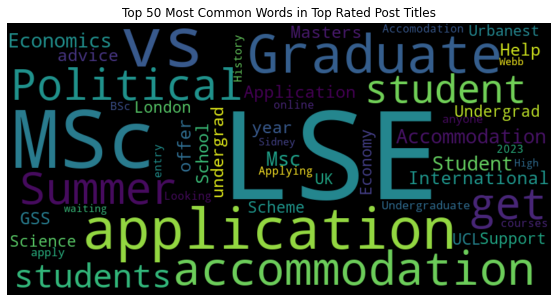

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Create a word cloud for 50 most common words in the title of the highest scoring 50 posts
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(top_titles_d)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 50 Most Common Words in Top Rated Post Titles')
plt.axis('off')
plt.show()

Secondly, we plot a line graph to visualize the top 50 words

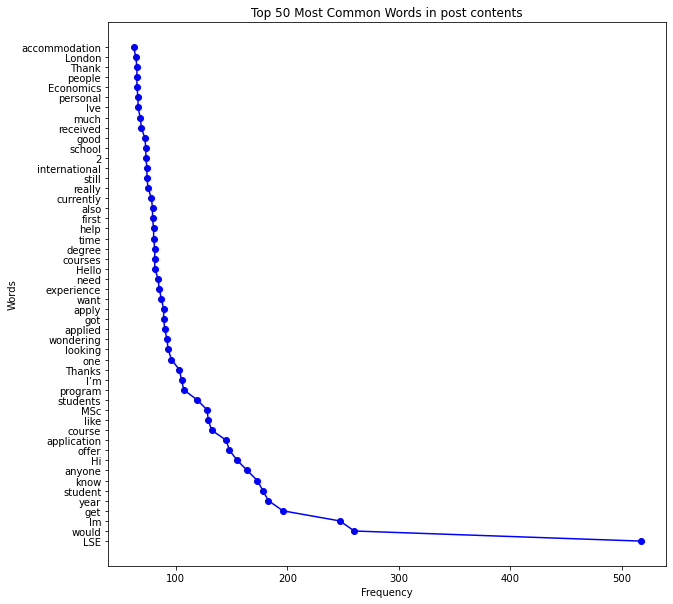

In [9]:
# Extracting keys and values from dictionary
names = list(contents_d.keys())
nums = list(contents_d.values())

# Creating a line graph
plt.figure(figsize=(10, 10))
plt.plot(nums, names, marker='o', color='blue')

# Adding labels and title
plt.ylabel('Words')
plt.xlabel('Frequency')
plt.title('Top 50 Most Common Words in post contents')

# Displaying the graph
plt.show()

Thirdly, we plot two bar charts to show the top 50 words in post contents and in top rated post contents respetively

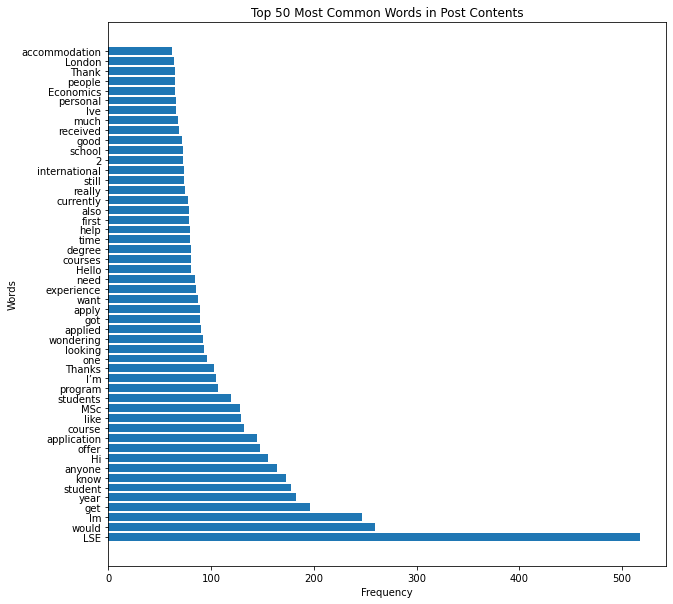

In [10]:
# Extracting keys and values from dictionary
words = list(contents_d.keys())
nums = list(contents_d.values())

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 10))
plt.barh(words, nums)

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 50 Most Common Words in Post Contents')

# Show the bar chart
plt.show()

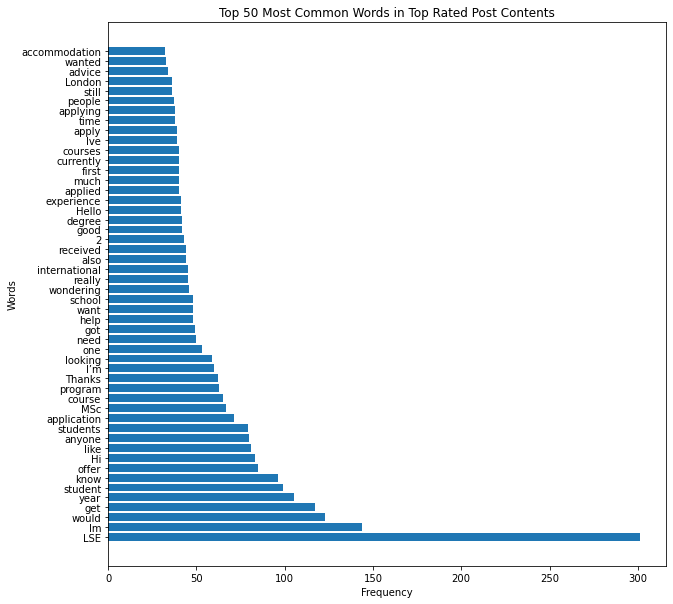

In [11]:
# Extracting keys and values from dictionary
top_words = list(top_contents_d.keys())
top_nums = list(top_contents_d.values())

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 10))
plt.barh(top_words, top_nums)

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 50 Most Common Words in Top Rated Post Contents')

# Show the bar chart
plt.show()

Finally, we plot a heat map to visualize the top 50 words

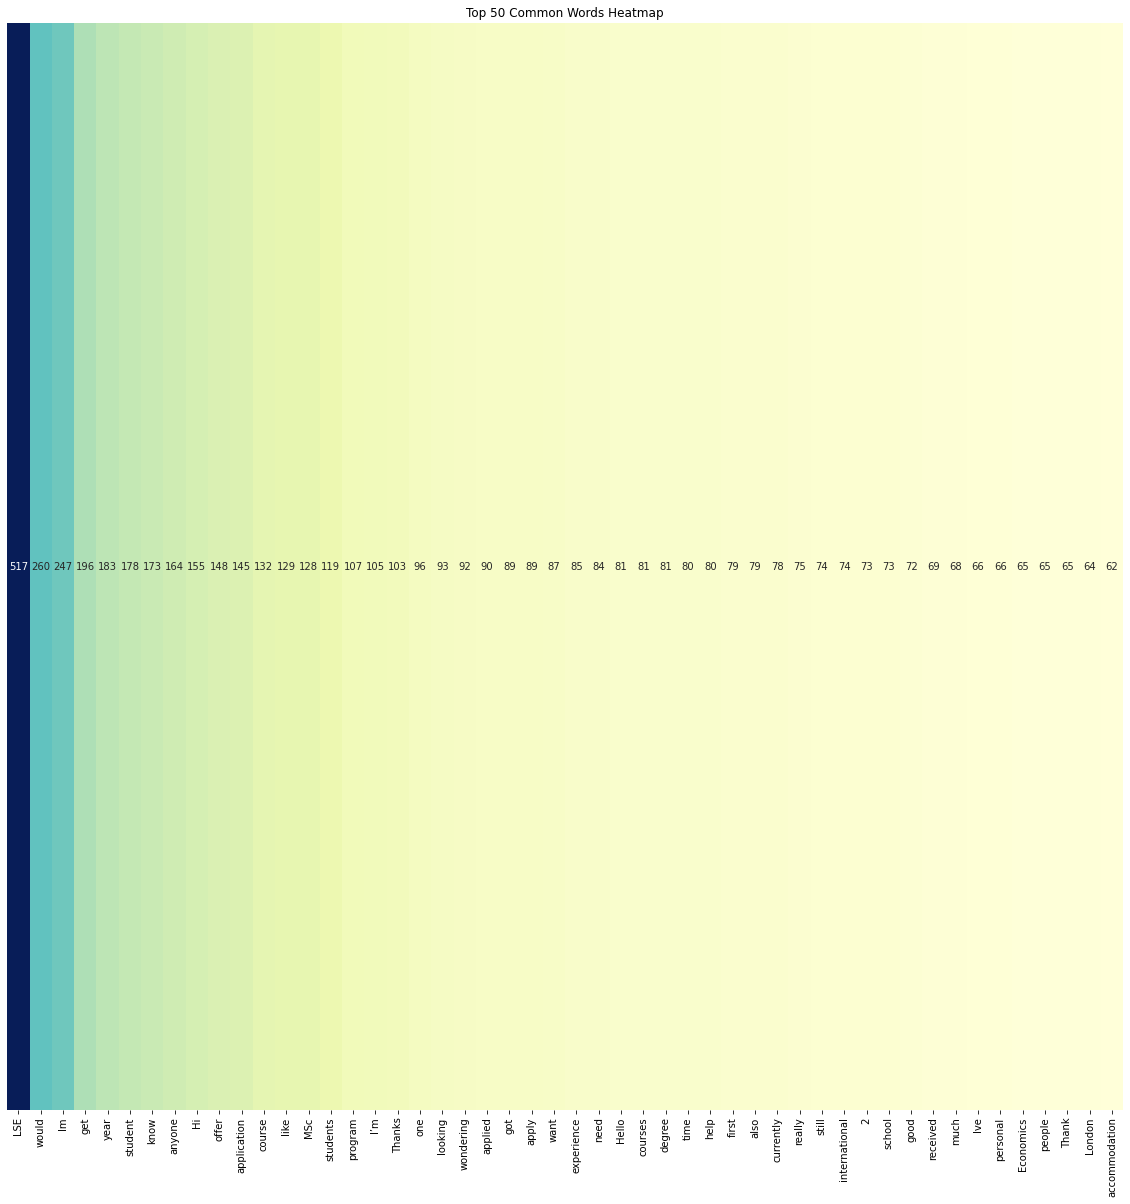

In [12]:
import seaborn as sns
# Creating a list of frequencies to use as heatmap data
heatmap_data = [nums]

# Creating a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=words, yticklabels=False)
plt.title('Top 50 Common Words Heatmap')
plt.show()

### Q1: What are some common traits that the public associate LSE with?

It can be shown that the common traits that the public associates LSE with are being international and strong in economics. This is because these two traits are represented by the most common words we extracted. There are also many keywords associated with MSc and graduates, which can be inferred that the postgraduate education of the LSE may be either famous or controversial.

### Q2:  What do people on Reddit want to know more about LSE?

People may want to know more about the application, the academic reputation and the accommodation of the LSE because there are many common keywords(offer, application, applied, accommodation, program, course, degree, personal, etc)related to these topics.

## Conclusion

### Findings

In conclusion, our report illustrates that many comments on Reddit about the LSE are focused on its academic reputation, its application process and its accommodation. The common traits that the LSE shows to the public are its strength in diversity and economic research. There are also many keywords related to the postgraduate education of the LSE, which indicates that this topic has drawn many heated discussions as well.

### Limitations

### Future improvements

In the future, we could use additional features of the NLTK module that are not currently included and we could also make use of other Python libraries to analyse the data.
We could also look at whether there are more positive or more negative words and analyse the top scored posts in regards to this.
Testing and debugging could also be a potential future improvement. We could invest more time in creating thorough tests and debugging tools to make it easier to catch and debug errors to make sure the code runs smoothly and reliably.